<a href="https://colab.research.google.com/github/Rushikesh3005/Bike-Sharing-Demand-Prediction/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT NAME:-NETFLIX MOVIES AND TV SHOWS CLUSTERING**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
#import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting google colab to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#uploading NETFLIX MOVIES AND TV SHOWS CLUSTERING csv file to google colab notebook
df=pd.read_csv('/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
df     #Dataframe looks like

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


#Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
df.isnull().sum()  #Checking for null values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df.isnull().sum() * 100 / len(df)   ##Checking for percentage of  null values present in original data

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

director column contain 30 % of our original data if we deleted the null value rows we will miss out lots of our movie data so just replace nul values by space

In [8]:
# Null values are replaced by blank
df['director'] = df['director']. fillna('')
df['cast'] = df['cast']. fillna('')
df['country'] = df['country']. fillna('')
df['date_added'] = df['date_added']. fillna('')
df['rating'] = df['rating']. fillna('')

In [9]:
df.isnull().sum() #checking null values after data cleaning

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
#checking for duplicate values
duplicate = df[df.duplicated()]
len(duplicate)

0

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#Exploratory Data Analysis


In [12]:
#Checking for movies and Tv shows available in dataframe
df.groupby('type').size()

type
Movie      5377
TV Show    2410
dtype: int64

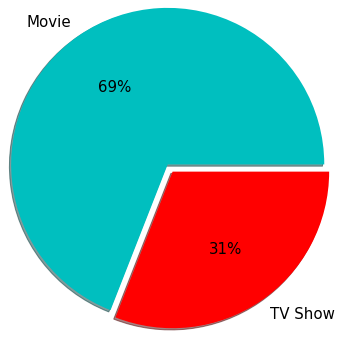

In [13]:

# declaring data as a movies and tv shows 
data = [5377,2410]
keys = ['Movie', 'TV Show']
color = ['c','r']
textprops = {"fontsize":15} 
explode = [0, 0.1]
plt.pie(data, labels=keys, colors=color,explode=explode,textprops =textprops,radius = 1.8,shadow = True, autopct='%.0f%%')# plotting data on chart
plt.show()

In [14]:
#seperating dataframe of type movie
movie_df= df[df['type'] == 'Movie']
movie_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,,Nasty C,,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [15]:
#seperating dataframe of type Tv show
Tv_show_df= df[df['type'] == 'TV Show']
Tv_show_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


##Comparing movies and tv shows released in recent year

In [16]:
#no. of movies released in a year from 2010
df1=pd.DataFrame(movie_df.groupby('release_year').size().reset_index(name='movie_count'))
movies_ywc_df=df1.tail(12)
movies_ywc_df

,release_year,movie_count
60,2010,136
61,2011,127
62,2012,158
63,2013,202
64,2014,244
65,2015,382
66,2016,642
67,2017,744
68,2018,734
69,2019,582


In [17]:
#no. of movies released in a year from 2010
df2=pd.DataFrame(Tv_show_df.groupby('release_year').size().reset_index(name='tvshow_count'))
tvshow_ywc_df=df2.tail(12)
tvshow_ywc_df

,release_year,tvshow_count
34,2010,37
35,2011,39
36,2012,61
37,2013,65
38,2014,90
39,2015,159
40,2016,240
41,2017,268
42,2018,387
43,2019,414


In [18]:

# making list of yearwise count of movies and tv shows
year_list=list(movies_ywc_df['release_year'])
ywc_movie_list=list(movies_ywc_df['movie_count'])
ywc_tvshow_list=list(tvshow_ywc_df['tvshow_count'])


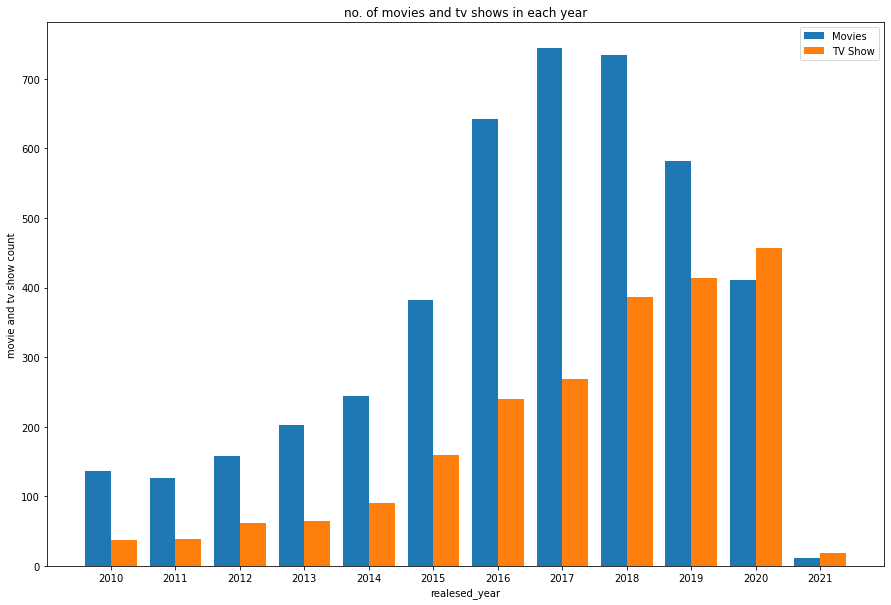

In [19]:
#Comparing movies and tv shows released in recent year
from matplotlib.pyplot import figure
figure( figsize=(15, 10))
X_axis = np.arange(len(year_list))
  
plt.bar(X_axis - 0.2, ywc_movie_list, 0.4, label = 'Movies')
plt.bar(X_axis + 0.2, ywc_tvshow_list, 0.4, label = 'TV Show')
  
plt.xticks(X_axis,year_list )
plt.xlabel("realesed_year")
plt.ylabel("movie and tv show count")
plt.title("no. of movies and tv shows in each year")
plt.legend()
plt.show()

###from given data in netflix movies and tv shows we can say that Netflix has increasingly focusing on TV rather than movies in recent years.

In [20]:

#Countries with more than 50 movies released
grouped_movies_df = movie_df.groupby(['country']).size().reset_index(name="Movie_Count")
grouped_movies_df=grouped_movies_df[grouped_movies_df['Movie_Count']>50]
grouped_movies_df=grouped_movies_df.drop(grouped_movies_df.index[[0]])#drop 1st row having country name as blank
grouped_movies_df = grouped_movies_df.sort_values(['Movie_Count'], ascending=[False])
grouped_movies_df

,country,Movie_Count
476,United States,1850
196,India,852
400,United Kingdom,193
45,Canada,118
116,Egypt,89
347,Spain,89
388,Turkey,73
300,Philippines,70
123,France,69
252,Japan,69


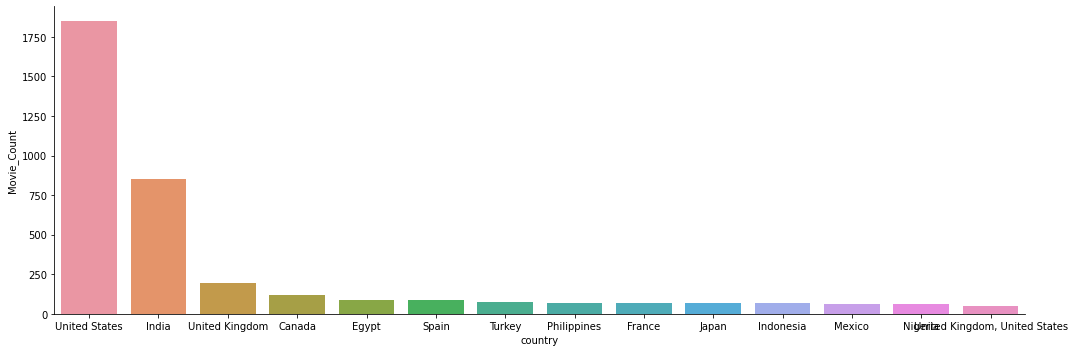

In [21]:
#catplot of country vs movie count
ax=sns.catplot(x="country", y="Movie_Count", kind='bar', data=grouped_movies_df,height=5, aspect=3)


In [22]:
#Countries with more than 50 Tv shows released
grouped_Tv_show_df = Tv_show_df.groupby(['country']).size().reset_index(name="Tvshow_Count")
grouped_Tv_show_df=grouped_Tv_show_df[grouped_Tv_show_df['Tvshow_Count']>50]
grouped_Tv_show_df=grouped_Tv_show_df.drop(grouped_Tv_show_df.index[[0]])
grouped_Tv_show_df = grouped_Tv_show_df.sort_values(['Tvshow_Count'], ascending=[False])
grouped_Tv_show_df

,country,Tvshow_Count
152,United States,705
133,United Kingdom,204
78,Japan,157
113,South Korea,147
64,India,71
125,Taiwan,68
15,Canada,59


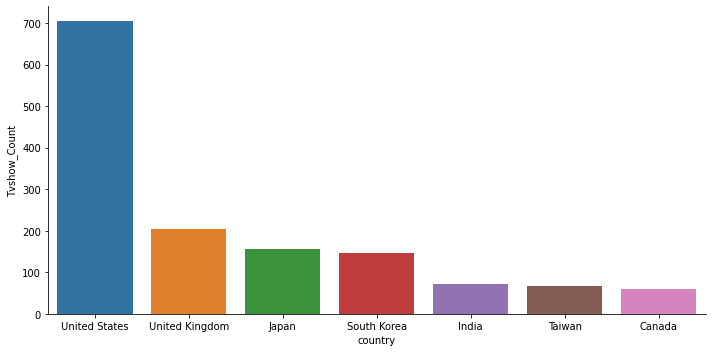

In [23]:
sns.catplot(x="country", y="Tvshow_Count", kind='bar', data=grouped_Tv_show_df,height=5, aspect=2)

#Ratings given to movies

In [24]:
#No. of movies having different ratings
movie_rating=movie_df.groupby(['rating']).size().reset_index(name="Count")
movie_rating

,rating,Count
0,,5
1,G,39
2,NC-17,3
3,NR,79
4,PG,247
5,PG-13,386
6,R,663
7,TV-14,1272
8,TV-G,111
9,TV-MA,1845


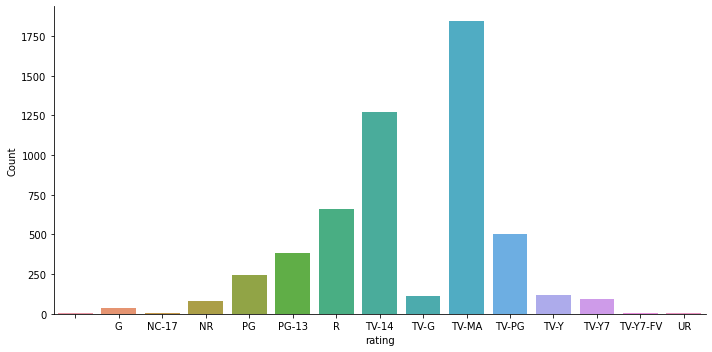

In [25]:
sns.catplot(x="rating", y="Count", kind='bar', data=movie_rating,height=5, aspect=2)

#Ratings given to Tv shows

In [26]:
#No. of Tv shows having different ratings
tvshow_rating=Tv_show_df.groupby(['rating']).size().reset_index(name="Count")
tvshow_rating

,rating,Count
0,,2
1,NR,5
2,R,2
3,TV-14,659
4,TV-G,83
5,TV-MA,1018
6,TV-PG,301
7,TV-Y,163
8,TV-Y7,176
9,TV-Y7-FV,1


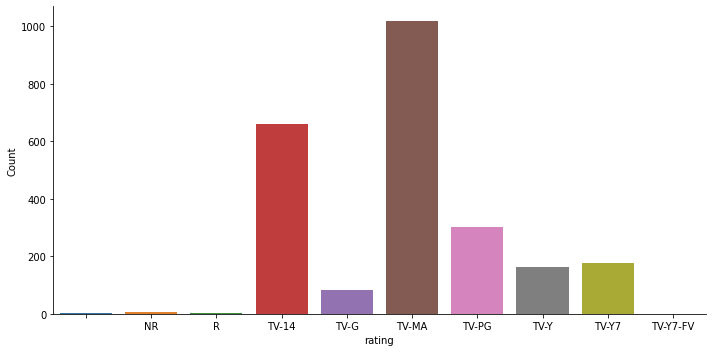

In [27]:
sns.catplot(x="rating", y="Count", kind='bar', data=tvshow_rating,height=5, aspect=2)

##Length of Movies and Tv shows

In [28]:
movie_df['duration']= movie_df['duration'].str.replace('min','')


In [29]:
movie_df['duration'] = movie_df['duration'].astype(int)

In [30]:
#spliting data in ranges of duration in minutes
ranges = [0,50,100,150,200,250,300,350]
movie_dur_rng = pd.DataFrame(movie_df.groupby(pd.cut(movie_df['duration'], ranges)).size().reset_index(name="Movie_Count"))
movie_dur_rng.rename(columns = {'duration':'Duration_in_min'}, inplace = True)
movie_dur_rng

,Duration_in_min,Movie_Count
0,"(0, 50]",258
1,"(50, 100]",2685
2,"(100, 150]",2208
3,"(150, 200]",211
4,"(200, 250]",13
5,"(250, 300]",1
6,"(300, 350]",1


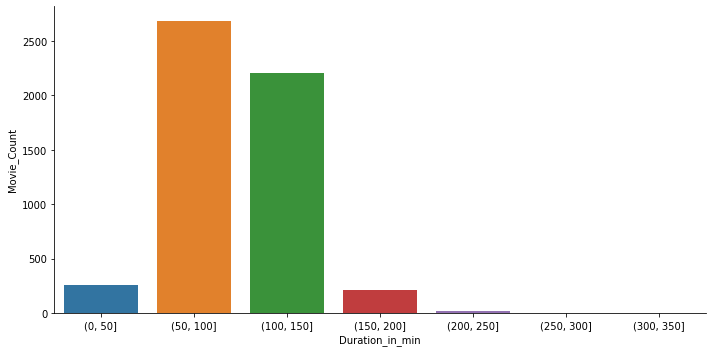

In [31]:
# Ranges of Movie duration vs movie count
sns.catplot(x="Duration_in_min", y="Movie_Count", kind='bar', data=movie_dur_rng,height=5, aspect=2)

In [32]:
Tv_show_df['duration']= Tv_show_df['duration'].str.replace('Season','')
Tv_show_df['duration']= Tv_show_df['duration'].str.replace('s','')


In [33]:

Tv_show_df['duration'] = Tv_show_df['duration'].astype(int)

In [34]:
#dataframe of no. of seasons and no. of tv shows
Tv_show_dur_rng = pd.DataFrame(Tv_show_df.groupby(Tv_show_df['duration']).size().reset_index(name="Tv_swshow_Count"))
Tv_show_dur_rng.rename(columns = {'duration':'no_of_seasons'}, inplace = True)
Tv_show_dur_rng

,no_of_seasons,Tv_swshow_Count
0,1,1608
1,2,382
2,3,184
3,4,87
4,5,58
5,6,30
6,7,19
7,8,18
8,9,8
9,10,6


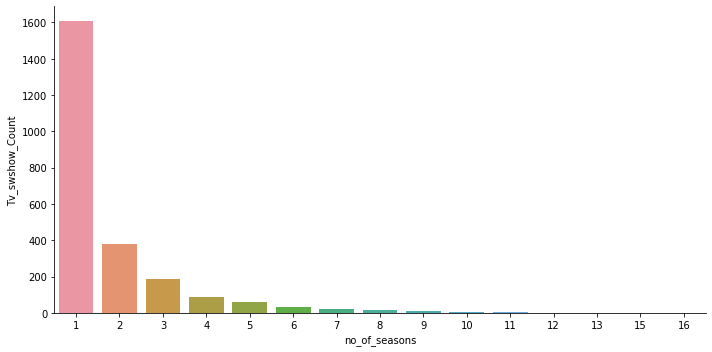

In [35]:
#No. of seasons vs no. of Tv shows
sns.catplot(x="no_of_seasons", y="Tv_swshow_Count", kind='bar', data=Tv_show_dur_rng,height=5, aspect=2)

##we are using type, tittle,director, cast, country, release year, rating ,listed in ,description columns for recoomendation

In [36]:
#new dataframe with needed features for reccomendation
new_df=df.drop(['show_id','date_added','duration'] , axis=1)

In [37]:
#Cleaning the str type data
new_df['cast']= new_df['cast'].str.replace(',','')
new_df['cast']= new_df['cast'].str.replace('-','')
new_df['rating']= new_df['rating'].str.replace('-','')
new_df['listed_in']= new_df['listed_in'].str.replace(',','')
new_df['country']= new_df['country'].str.replace(',','')
new_df['listed_in']= new_df['listed_in'].str.replace('&','')
new_df['description']= new_df['description'].str.replace(',','')
new_df['description']= new_df['description'].str.replace('-','')

new_df

,type,title,director,cast,country,release_year,rating,listed_in,description
0,TV Show,3%,,João Miguel Bianca Comparato Michel Gomes Rodo...,Brazil,2020,TVMA,International TV Shows TV Dramas TV Sci-Fi Fa...,In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,Demián Bichir Héctor Bonilla Oscar Serrano Aza...,Mexico,2016,TVMA,Dramas International Movies,After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,Tedd Chan Stella Chung Henley Hii Lawrence Koh...,Singapore,2011,R,Horror Movies International Movies,When an army recruit is found dead his fellow ...
3,Movie,9,Shane Acker,Elijah Wood John C. Reilly Jennifer Connelly C...,United States,2009,PG13,Action Adventure Independent Movies Sci-Fi F...,In a postapocalyptic world ragdoll robots hide...
4,Movie,21,Robert Luketic,Jim Sturgess Kevin Spacey Kate Bosworth Aaron ...,United States,2008,PG13,Dramas,A brilliant group of students become cardcount...
...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,Imad Creidi Antoinette Turk Elias Gergi Carmen...,Sweden Czech Republic United Kingdom Denmark N...,2005,TVMA,Dramas International Movies,When Lebanon's Civil War deprives Zozo of his ...
7783,Movie,Zubaan,Mozez Singh,Vicky Kaushal SarahJane Dias Raaghav Chanana M...,India,2015,TV14,Dramas International Movies Music Musicals,A scrappy but poor boy worms his way into a ty...
7784,Movie,Zulu Man in Japan,,Nasty C,,2019,TVMA,Documentaries International Movies Music Musi...,In this documentary South African rapper Nasty...
7785,TV Show,Zumbo's Just Desserts,,Adriano Zumbo Rachel Khoo,Australia,2019,TVPG,International TV Shows Reality TV,Dessert wizard Adriano Zumbo looks for the nex...


#Concat all column excluding tittle in a one column 

In [38]:
new_df['release_year'] = new_df['release_year'].astype(str)

In [39]:
# concat all string values in a single column
new_df['concat']=new_df[['type', 'director','cast','country','release_year','rating','listed_in','description']].T.agg(' '.join)
new_df= new_df.drop(['type', 'director','cast','country','release_year','rating','listed_in','description'], axis=1)
new_df

,title,concat
0,3%,TV Show João Miguel Bianca Comparato Michel G...
1,7:19,Movie Jorge Michel Grau Demián Bichir Héctor B...
2,23:59,Movie Gilbert Chan Tedd Chan Stella Chung Henl...
3,9,Movie Shane Acker Elijah Wood John C. Reilly J...
4,21,Movie Robert Luketic Jim Sturgess Kevin Spacey...
...,...,...
7782,Zozo,Movie Josef Fares Imad Creidi Antoinette Turk ...
7783,Zubaan,Movie Mozez Singh Vicky Kaushal SarahJane Dias...
7784,Zulu Man in Japan,Movie Nasty C 2019 TVMA Documentaries Intern...
7785,Zumbo's Just Desserts,TV Show Adriano Zumbo Rachel Khoo Australia 2...


In [40]:
new_df=new_df.set_index('title')  #set index as a title
new_df

,concat
title,
3%,TV Show João Miguel Bianca Comparato Michel G...
7:19,Movie Jorge Michel Grau Demián Bichir Héctor B...
23:59,Movie Gilbert Chan Tedd Chan Stella Chung Henl...
9,Movie Shane Acker Elijah Wood John C. Reilly J...
21,Movie Robert Luketic Jim Sturgess Kevin Spacey...
...,...
Zozo,Movie Josef Fares Imad Creidi Antoinette Turk ...
Zubaan,Movie Mozez Singh Vicky Kaushal SarahJane Dias...
Zulu Man in Japan,Movie Nasty C 2019 TVMA Documentaries Intern...


In [41]:
#import spacy liabrary
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
stopwords = en.Defaults.stop_words
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [42]:

print("lenght of stopwards is:")
len(stopwords)

lenght of stopwards is:


326

In [43]:
import string
def text_process(msg):  #Removing punctuayions from data
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return nopunc

def stop_words(sent):#Removing stopwards of lang english from data
    word =[word for word in sent if word not in stopwords]
    word=''.join(word)
    return word



In [44]:
def lemmatization_(sentence): #lemmatization_ of data
    doc = en(sentence)
    l=list()
    for word in doc:
        
        l.append(word.lemma_)

    return ' '.join(l)

In [45]:
new_df['concat'] = new_df['concat'].apply(text_process)
new_df['concat'] = new_df['concat'].apply(stop_words)


In [46]:
new_df['concat']=new_df['concat'].apply(lambda x:lemmatization_(x))

In [47]:
new_df

,concat
title,
3%,tv show João Mguel Bnc Comprto Mchel Gomes R...
7:19,move Jorge Mchel Gru Demán Bchr Héctor Bonll O...
23:59,move Glbert Chn Tedd Chn Stell Chung Henley H ...
9,move shne acker eljh Wood John C relly jennfer...
21,move Robert Luketc Jm Sturgess Kevn Spcey Kte ...
...,...
Zozo,Move Josef Fres Imd Cred Antonette Turk Els Ge...
Zubaan,move Mozez Sngh Vcky Kushl SrhJne Ds Rghv Chnn...
Zulu Man in Japan,move Nsty C 2019 TVMA Documentres Internto...


In [48]:
# Vectorization using tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0,
                                   max_features=2000,
                                   stop_words='english')
X = tfidf_vectorizer.fit_transform(new_df['concat'])


In [49]:
a=X.toarray()
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
tfidf_vectorizer.get_feature_names()  #top 2000 features

['1980',
 '1990',
 '1992',
 '1993',
 '1994',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 'abdel',
 'abdullh',
 'abhshek',
 'abrhm',
 'acton',
 'ad',
 'adel',
 'adm',
 'adms',
 'adn',
 'adrn',
 'adty',
 'adventure',
 'afrc',
 'afrcn',
 'ahmd',
 'ahmed',
 'ahn',
 'ajy',
 'akhtr',
 'akshy',
 'al',
 'albert',
 'alberto',
 'alc',
 'alce',
 'alejndro',
 'alessndro',
 'alex',
 'alexnder',
 'alexndr',
 'alfonso',
 'alfred',
 'allen',
 'alln',
 'allson',
 'aln',
 'alson',
 'amber',
 'amerc',
 'amercn',
 'amn',
 'amnd',
 'amr',
 'amrt',
 'amt',
 'amtbh',
 'amy',
 'anderson',
 'andre',
 'andrew',
 'andré',
 'andrés',
 'andy',
 'angel',
 'angeles',
 'anl',
 'anme',
 'ann',
 'annd',
 'anne',
 'ant',
 'anthony',
 'anton',
 'antono',
 'anupm',
 'ao',
 'ar',
 'arb',
 'arel',
 'argentn',
 'arjun',
 'arn',
 'arnold'

#Cosine Similarity:

In [51]:
# importing cosine smilarity algorithm
from sklearn.metrics.pairwise import cosine_similarity
co_sim = cosine_similarity(a)
co_sim

array([[1.        , 0.06667032, 0.05818694, ..., 0.01741848, 0.1536349 ,
        0.0085869 ],
       [0.06667032, 1.        , 0.01286798, ..., 0.08093874, 0.00757164,
        0.00801386],
       [0.05818694, 0.01286798, 1.        , ..., 0.00586332, 0.02849818,
        0.01319375],
       ...,
       [0.01741848, 0.08093874, 0.00586332, ..., 1.        , 0.07072742,
        0.2792484 ],
       [0.1536349 , 0.00757164, 0.02849818, ..., 0.07072742, 1.        ,
        0.1355028 ],
       [0.0085869 , 0.00801386, 0.01319375, ..., 0.2792484 , 0.1355028 ,
        1.        ]])

In [52]:
#cosine similarity score for index '0' movie
movies_list=sorted(list(enumerate(co_sim[0])),reverse=True,key=lambda x:x[1])[1:6]
movies_list

[(989, 0.35551255422509653),
 (4611, 0.30991655525669537),
 (4233, 0.3071585872641075),
 (6907, 0.30447063118525),
 (4104, 0.2965566710898425)]

In [95]:
def recommend_movies(movie):  #define function to get top 5 recoomended movies to the given movie
  index=df[df["title"]==movie].index[0]
  dist=co_sim[index]
  movies_list=sorted(list(enumerate(dist)),reverse=True,key=lambda x:x[1])[1:6]
  print("Recommended Movies are:")
  for i in movies_list:
    if df.iloc[i[0]].type=='Movie':
      print(df.iloc[i[0]].title)
    print("\n")
  print("Recommended Tv shows are:")
  for i in movies_list:
    if df.iloc[i[0]].type=='TV Show':
      print(df.iloc[i[0]].title)
    print("\n")



In [96]:
recommend_movies("Zubaan") 

Recommended Movies are:
Jatts in Golmaal


Manje Bistre


Yaara O Dildaara


Super Bheem Bana Vajraveer


Evening Shadows


Recommended Tv shows are:












## K-Mean Clusturing

In [55]:
df['listed_in'] = df['listed_in'].apply(lambda x : x.lower())

In [56]:
cluster_df=df.copy()

In [57]:
cluster_df=cluster_df.loc[:,['type','country','rating','listed_in']]

In [58]:
def content_list(text): #creating list of words seerated by ","
   
   all_content = list(set(text.split(',')))
   return all_content

In [59]:
cluster_df['listed_in']=cluster_df['listed_in'].apply(lambda x:content_list(x))
cluster_df['country']=cluster_df['country'].apply(lambda x:content_list(x))

In [60]:
from sklearn.preprocessing import MultiLabelBinarizer
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode data and join to dataframe
clstr_df = cluster_df.join(pd.DataFrame(mlb.fit_transform(cluster_df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=cluster_df.index))
c = cluster_df.join(pd.DataFrame(mlb.fit_transform(cluster_df.pop('country')),
                                              columns=mlb.classes_,
                                              index=cluster_df.index))

In [61]:
#one hot encoding
a=pd.get_dummies(cluster_df.rating)
b=pd.get_dummies(cluster_df.type)

In [62]:
#creating dataframe of encoded features
Cluster_df=pd.concat([clstr_df,a,b,c], axis=1, join='inner')
Cluster_df=Cluster_df.drop(['type','country','rating'],axis = 1)
Cluster_df

,anime features,children & family movies,classic & cult tv,classic movies,comedies,crime tv shows,cult movies,documentaries,docuseries,dramas,...,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,West Germany,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#import liabraries for k mean clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  silhouette_score

In [64]:
scaler = MinMaxScaler() #Scaling data between 0 to 1

scaler.fit(Cluster_df)

MinMaxScaler()

In [65]:
a=scaler.transform(Cluster_df)

In [66]:
sse = []              #find out best k value between 1 to 20
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(Cluster_df)
    sse.append(km.inertia_)

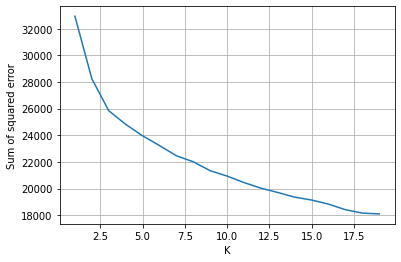

In [67]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.grid()

In [68]:
from yellowbrick.cluster import SilhouetteVisualizer

In [69]:
a={}
range_n_clusters=range(2,20)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(Cluster_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(Cluster_df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    a[n_clusters]=score

For n_clusters = 2, silhouette score is 0.15947065367190233)
For n_clusters = 3, silhouette score is 0.12972526183337488)
For n_clusters = 4, silhouette score is 0.1193001115299997)
For n_clusters = 5, silhouette score is 0.11223941324723982)
For n_clusters = 6, silhouette score is 0.11812206233553053)
For n_clusters = 7, silhouette score is 0.09411732079924326)
For n_clusters = 8, silhouette score is 0.1092389050883984)
For n_clusters = 9, silhouette score is 0.12825583361652004)
For n_clusters = 10, silhouette score is 0.1270876236127244)
For n_clusters = 11, silhouette score is 0.12769807521370913)
For n_clusters = 12, silhouette score is 0.13150702377985116)
For n_clusters = 13, silhouette score is 0.1254241538860578)
For n_clusters = 14, silhouette score is 0.13031453623462563)
For n_clusters = 15, silhouette score is 0.14379462082616967)
For n_clusters = 16, silhouette score is 0.13476210647779074)
For n_clusters = 17, silhouette score is 0.14066981808204568)
For n_clusters = 18,

In [70]:
#fitting data in k mean clustering algorith
km = KMeans(n_clusters=18)
y_predicted = km.fit_predict(Cluster_df)
y_predicted

array([3, 5, 9, ..., 4, 3, 8], dtype=int32)

In [71]:
pd.Series(y_predicted).value_counts()

17    678
3     675
8     668
5     562
15    551
7     536
10    464
13    441
4     431
2     391
1     385
0     378
14    362
16    353
12    273
9     270
6     228
11    141
dtype: int64

In [72]:
cluster_df['cluster']=y_predicted
cluster_df.head(10)

,type,rating,cluster
0,TV Show,TV-MA,3
1,Movie,TV-MA,5
2,Movie,R,9
3,Movie,PG-13,17
4,Movie,PG-13,1
5,TV Show,TV-MA,3
6,Movie,TV-MA,4
7,Movie,R,1
8,Movie,TV-14,13
9,Movie,TV-MA,4


In [73]:
from sklearn.manifold import TSNE

x_embedded = TSNE(n_components=2).fit_transform(Cluster_df)

x_embedded.shape

(7787, 2)

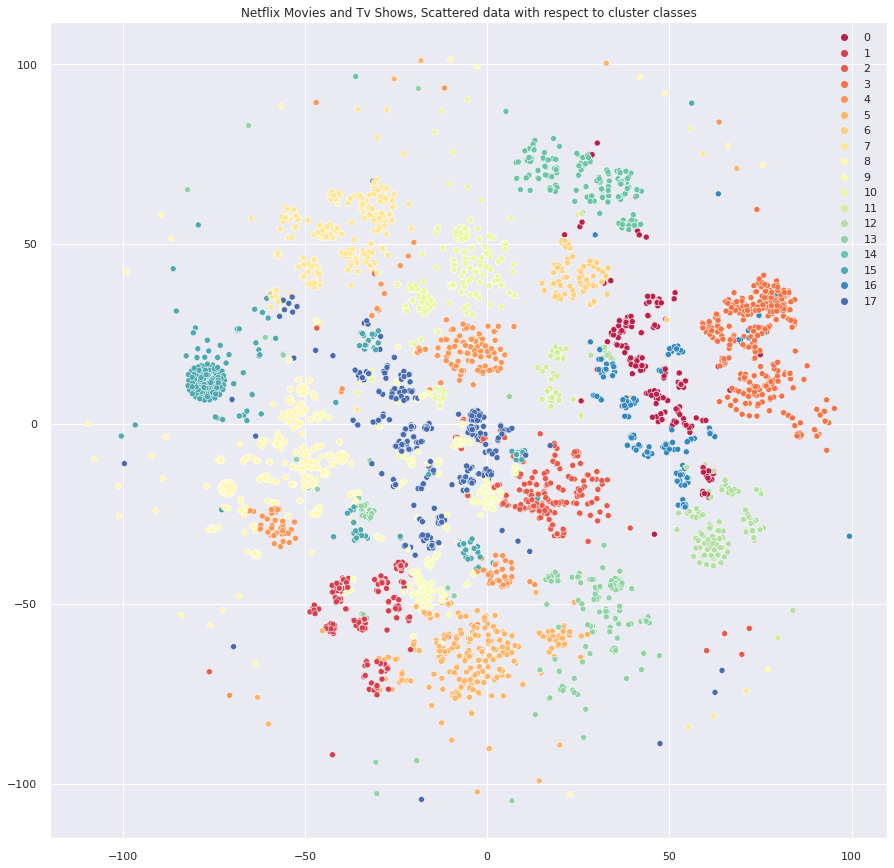

In [74]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("Spectral", len(set(y_predicted)))

# plot
sns.scatterplot(x_embedded[:,0], x_embedded[:,1], hue=y_predicted, legend='full', palette=palette)
plt.title("Netflix Movies and Tv Shows, Scattered data with respect to cluster classes")
plt.show()

#Conclusion

1. Exploratory Data Analysis 

2. Understanding Netflix has increasingly focusing on TV rather than movies in recent years.

3. Movie reccomendation system using cosine similarity algorithm
4. Clustering similar content by matching text-based features using K-mean clustering algorithm